In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

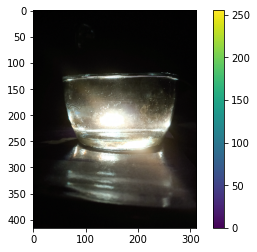

(416, 312, 3)


In [16]:
img = cv.imread('/content/IMG20220210025022.jpg')

scale_percent = 10
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)

dsize = (width, height)
resized = cv.resize(img, dsize, interpolation= cv.INTER_LINEAR)
#cv2_imshow(resized)
plt.imshow(resized),plt.colorbar(),plt.show()
print(resized.shape)

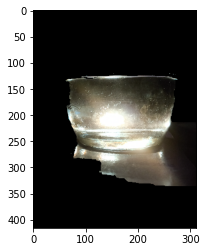

(<matplotlib.image.AxesImage at 0x7fd847a605d0>, None)

In [17]:
image = resized
mask = np.zeros(image.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(image,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
newimg = image*mask2[:,:,np.newaxis]
plt.imshow(newimg),plt.show()